In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = keras.datasets.mnist #import dataset mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = data.load_data()
train_images.shape

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

# verifying data image

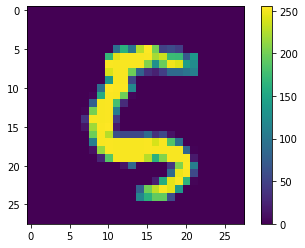

In [11]:
fig = plt.Figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.show()

In [12]:
x_train, x_test = train_images / 255.0, test_images / 255.0
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

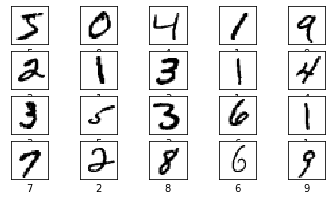

In [17]:
fig = plt.Figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.grid(False)
plt.show()

# Build Model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics= ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2592 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1148 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0789 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0597 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [23]:
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)

313/313 - 0s - loss: 0.0796 - accuracy: 0.9791


In [24]:
pro_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])

In [30]:
pred = pro_model.predict(x_test)
pred[1000]

array([3.9255355e-08, 1.2313926e-06, 8.3613747e-13, 2.9221515e-05,
       3.5558901e-07, 3.3619802e-09, 1.8547237e-15, 4.6558180e-05,
       1.9675936e-09, 9.9992263e-01], dtype=float32)

In [31]:
np.argmax(pred[1000])

9

In [32]:
test_labels[1000]

9

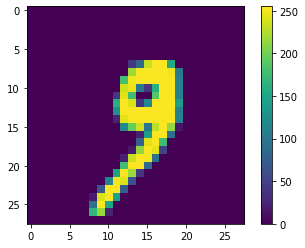

In [35]:
fig = plt.Figure()
plt.imshow(test_images[1000])
plt.colorbar()
plt.show()